#Least Square Estimation

The best estimation of a value is that which minimizes the sum of the squared errors between what we observed and what we expect.
Let us consider the following measurements($\mathbf{y}$) for estimating the parameters($\mathbf{x}$):  
$\mathbf{y} = \begin{bmatrix} y_1 & y_2 & y_3 & y_4 & y_5\end{bmatrix}$  
To handle this, we have to assume appropriate the measurement model. Let us consider linear model for the measurement as below:  
$\mathbf{y} = \mathbf{H}x+\mathbf{v}$.  
where,  
(i) $v$, is the measurement noise independent of each other such that $\mathbf{v} \sim \mathcal{N}(μ, σ^2)$. The measurement noise is the idependent random variable having equal variance. These are considered as Independent Identically Distributed (IID). The IID means that each random variable follows the same probability distribution and all the variables are mutually independent. It means that the off diagonal elements of the covariance matrix are zero, so the covariance matrix of the measurement ($\mathbf{R}$) may be written as:

$ \mathbf{R} = \begin{pmatrix}
\sigma^2 & 0 &... & 0 \\ 
0 & \sigma^2 & ... &0\\ 
.. & .. & ... &... \\ 
0 & 0 & ... & \sigma^2 \\
\end{pmatrix}$

(ii) $H$, slope for the linear model, in general, it is called the Jacobian and is obtained by partially differentiating the measurement model with respect to the parameters.
The size of Jacobian matrix is $m\times n$, where, $m$ is the number of measurement and the $n$ is the number of parameters.

${y_1} =\mathbf{H_1x}+v_1$  
${y_2} =\mathbf{H_2x}+v_2$  
${y_3} =\mathbf{H_3x}+v_3$  
${y_4} =\mathbf{H_4x}+v_4$  
${y_5} =\mathbf{H_5x}+v_5$  
Let error may be defined as below:  
${e_1} =y_1-\mathbf{H_1x}$  
${e_2} =y_2-\mathbf{H_2x}$  
${e_3} =y_3-\mathbf{H_3x}$  
${e_4} =y_4-\mathbf{H_4x}$  
${e_5} =y_5-\mathbf{H_5x}$  

Wring the error equations in the matrix form:  
$\mathbf{e}=\mathbf{y}-\mathbf{Hx}$.  
In case, we are dealing with only one parameter, the $\mathbf{x}$ would be scalar only and the size of $\mathbf{H}$ would be $m\times1$. Recall that $m$ is the number of measurements.

According to LS method, the best estimate minimizes the sum of squared error, so,  
$\hat{\mathbf{x}}_{LS} = arg min(e_1^2+e_2^2+e_3^2+e_4^2+e_5^2)$ 

The RHS is also known as squared error cost function or squared error criterion and can be written as:
$ \mathcal{L}_{LS}(x)=e_1^2+e_2^2+e_3^2+e_4^2+e_5^2 $.  
In vector form,   
$ \mathcal{L}_{LS}(\mathbf{x})=\mathbf{e^Te}$.  
Substituting for $\mathbf{e}$, we get,   
$ \mathcal{L}_{LS}(\mathbf{x})=\mathbf{(y-Hx)^T(y-Hx)}$  
$ \mathcal{L}_{LS}(\mathbf{x})=\mathbf{(y^T-x^TH^T)(y-Hx)}$  
$ \mathcal{L}_{LS}(\mathbf{x})=\mathbf{(y^Ty-y^THx-x^TH^Ty-x^TH^THx)}$.   
Differentiating with respect to $\mathbf{x}$ and equating to zero, we get the best estimate of the $\mathbf{x}$ as below:

\begin{align}
\hat{\mathbf{x}} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}



### Example -1 One Parameters
-----
Estimate the resistance of an electrical component using a multimeter observations of voltage drop across the resistor at various current values. The voltage observations are tabulated below:

| Current (A) | Voltage (V) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.38        |
| 0.4         | 2.06        |
| 0.5         | 2.47        |
| 0.6         | 3.17        |


Fit a line assuming linear measurement model without intercept $V = IR$ using the method of least squares to evaluate the resistance.

### Estimating Resistance
----

Recall the linear measurement model and the parameter estimation $\hat{x}$ are given by the following relations:

\begin{align}
\mathbf{y} = \mathbf{H}x+\mathbf{v}\
\end{align}

\begin{align}
\hat{x} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}

In case of present problem $\mathbf{y=V}$ and $x=R$, for a resitance parameter using voltage and the current, our measurement model is given by:  

\begin{align}
\mathbf{V} = \mathbf{I}R+\mathbf{v}\
\end{align}

The best estimated resistance is given by:   

\begin{align}
\hat{R} = \left(\mathbf{I}^T\mathbf{I}\right)^{-1}\mathbf{I}^T\mathbf{y}
\end{align}

where, $\mathbf{H=I}$, the partial derivative of the measurement model with respect to the parameter.

In [4]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Store the voltage and current data as column vectors. The shape of H has to be (5,1) not (5,)
# Define the H matrix - the Jacobian 

H = np.array([[0.2, 0.3, 0.4, 0.5, 0.6]]).T #Remove one set of [] and try to estimate R
#H = np.array([0.2, 0.3, 0.4, 0.5, 0.6]).reshape(5,1)
V = np.array([1.23, 1.38, 2.06, 2.47, 3.17]).T
print(H.shape, V.shape)

(5, 1) (5,)


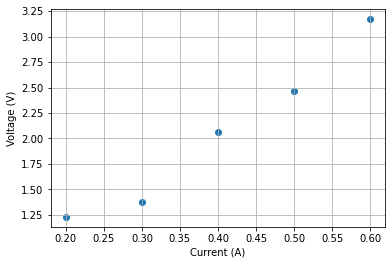

In [5]:
plt.scatter(H, V)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

In [6]:
R=np.matmul(H.T,H)
print(R, R.shape)
R=np.linalg.inv(R)
R=np.matmul(R,H.T)
R=np.matmul(R,V)
print('The resistance is : ',R, R[0])

[[0.9]] (1, 1)
The resistance is :  [5.13444444] 5.134444444444445


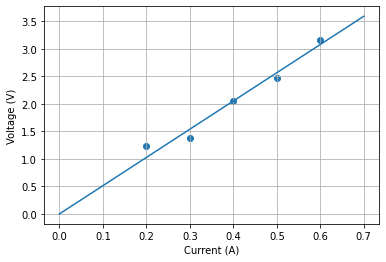

In [8]:
# Plot line.
I_line = np.arange(0, 0.8, 0.1).reshape(8, 1)
V_line = I_line*R

plt.scatter(H, V)
plt.plot(I_line, V_line)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

## Problem Statement - Two Parameters
-----
The measurements of voltage drop and the current are taken to measure the resistance using multimeter. Following data are collected:

| Current (A) | Voltage (V) |
|-------------|-------------|
| 0.2         | 1.23        |*italicised text*
| 0.3         | 1.30        |
| 0.4         | 1.50|
| 0.5         |1.70|
| 0.6         | 2.2|

Fit a line assuming linear measurement model with intercept $V = IR + V_0$ using the method of least squares to evaluate the resistance.

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Store the voltage and current data as column vectors.
I = np.array([[0.2, 0.3, 0.4, 0.5, 0.6]]).T
V = np.array([[1.23, 1.30, 1.5, 1.7, 2.2]]).T

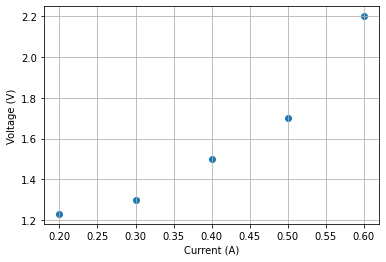

In [ ]:
plt.scatter(I, V)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

Now, in this case we have to compute the two parameters, $\mathbf{R}$ and $\mathbf{b}$. So we have $m=4; n=2$, where $m$ is number of observations and $n$ is the number of parameters.  
It is also important to note that, the Jacobian matrix $\mathbf{H}$ is not equal to $\mathbf{I}$ but is of size $m × n$ and the elemts are given by the partial differentiation of measurement model with respect to the parameters.

$ \mathbf{H} = \begin{pmatrix}
\frac{\partial y_1}{\partial R} & \frac{\partial y_1}{\partial b} \\ 
\frac{\partial y_2}{\partial R} & \frac{\partial y_2}{\partial b} \\ 
\frac{\partial y_3}{\partial R} & \frac{\partial y_3}{\partial b} \\
\frac{\partial y_4}{\partial R} & \frac{\partial y_4}{\partial b} \\
\frac{\partial y_5}{\partial R} & \frac{\partial y_5}{\partial b} \\
\end{pmatrix}=
\begin{pmatrix}
I_1 & 1 \\ 
I_2 & 1 \\ 
I_3 & 1 \\ 
I_4 & 1 \\ 
I_5 & 1 \\ 
\end{pmatrix}$

## Least Square Formulation
----
From the Squared Error Criterion

\begin{align}
\hat{R} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}

In [ ]:
H = np.ones((5, 2))
print(H)
#Assign the values of the current in the first [index-0] column of the Jacobian matrix using the : operator
H[:, 0] = I.T
print(H)
x_ls = inv(H.T.dot(H)).dot(H.T).dot(V)
print('The slope and offset parameters of the best-fit line (i.e., the resistance and offset) are [R, b]:')
print(x_ls[0,0])
print(x_ls[1,0])

# Plot line.
I_line = np.arange(0, 0.8, 0.1).reshape(8, 1)
V_line = x_ls[0,0]*I_line + x_ls[1,0]

plt.scatter(I, V)
plt.plot(I_line, V_line)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()